In [1]:
#!/usr/bin/env python3
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
cm.update(
    "rise",
    {
        "theme": "sky",
        "transition": "fade",
        "start_slideshow_at": "selected",
     }
)

{'theme': 'sky', 'transition': 'fade', 'start_slideshow_at': 'selected'}

In [2]:
#Initialisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
#S&P500 Index
sp = yf.Ticker("^GSPC")
#Nikkei Index
nikkei = yf.Ticker("^N225")
# Straits Times Index
sti = yf.Ticker("^STI")

# Retriving DF of the 3 tickers , forward fill to fill NAN entries and backfill to fill day 1 NAN entries
#COVID DF
covid_df = yf.download("^GSPC ^N225 ^STI", start="2020-01-18", end="2020-07-18")
covid_df = covid_df.fillna(method='ffill')
covid_df = covid_df.fillna(method='bfill')
covid_df = covid_df.reset_index()
covid_df = covid_df[['Date','Adj Close']]
covid_df = covid_df.rename(columns={'Adj Close': 'Adj Close_COVID', 'Date':'Date_COVID'})

#SARS DF
sars_df = yf.download("^GSPC ^N225 ^STI", start="2003-02-08", end="2003-08-09")
sars_df = sars_df.fillna(method='ffill')
sars_df = sars_df.fillna(method='bfill')
sars_df = sars_df.reset_index()
sars_df = sars_df[['Date','Adj Close']]
sars_df = sars_df.rename(columns={'Adj Close': 'Adj Close_SARS', 'Date':'Date_SARS'})

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed


# Comparing global stock indexes during SARS vs COVID-19

Explain data frame

In [4]:
merged = covid_df.merge(sars_df, left_index = True, right_index = True)
merged

Date_COVID Adj Close_COVID                             Date_SARS  \
                         ^GSPC         ^N225         ^STI              
0   2020-01-17     3329.620117  24083.509766  3280.090088 2003-02-07   
1   2020-01-20     3329.620117  24083.509766  3280.090088 2003-02-10   
2   2020-01-21     3320.790039  23864.560547  3247.169922 2003-02-11   
3   2020-01-22     3321.750000  24031.349609  3253.929932 2003-02-12   
4   2020-01-23     3325.540039  23795.439453  3234.560059 2003-02-13   
..         ...             ...           ...          ...        ...   
126 2020-07-13     3155.219971  22784.740234  2631.080078 2003-08-04   
127 2020-07-14     3197.520020  22587.009766  2620.189941 2003-08-05   
128 2020-07-15     3226.560059  22945.500000  2648.899902 2003-08-06   
129 2020-07-16     3215.570068  22770.359375  2623.669922 2003-08-07   
130 2020-07-17     3224.729980  22696.419922  2618.479980 2003-08-08   

    Adj Close_SARS                            
             ^GSPC        ^N225         ^STI  
0       829.690002  8484.929688  1282.729980  
1       835.969971  8484.929688  1282.729980  
2       829.200012  8484.929688  1295.969971  
3       818.679993  8664.169922  1295.969971  
4       817.369995  8599.660156  1268.329956  
..             ...          ...          ...  
126     982.820007  9452.790039  1537.280029  
127     965.460022  9382.580078  1508.689941  
128     967.080017  9323.910156  1510.180054  
129     974.119995  9265.559570  1533.609985  
130     977.590027  9327.530273  1534.540039  

[131 rows x 8 columns]

In [5]:
#pull out COVID GSPC column
covid_GSPC =  merged.iloc[:,[1],]
covid_GSPC_rolling = covid_GSPC.rolling(window=7).mean()

#pull out SARS GSPC column
sars_GSPC = merged.iloc[:,[5],]
sars_GSPC_rolling = sars_GSPC.rolling(window=7).mean()

#pull out COVID N225 column
covid_N225 =  merged.iloc[:,[2],]
covid_N225_rolling = covid_N225.rolling(window=7).mean()

#pull out SARS N225 column
sars_N225 = merged.iloc[:,[6],]
sars_N225_rolling = sars_N225.rolling(window=7).mean()

#pull out COVID STI column
covid_STI =  merged.iloc[:,[3],]
covid_STI_rolling = covid_STI.rolling(window=7).mean()

#pull out SARS STI column
sars_STI = merged.iloc[:,[7],]
sars_STI_rolling = sars_STI.rolling(window=7).mean()


days = [i for i in range(len(merged.iloc[:,[0],]))]

In [6]:
def two_scales(ax1, days, data1, data2, label1, label2):
    ax2 = ax1.twinx()
    
    ax1.plot(days, data1, color='#003f5c')
    ax1.set_xlabel('Days')
    ax1.set_ylabel(label1)
    
    ax2.plot(days, data2, color='#ffa600')
    ax2.set_ylabel(label2)
    return ax1, ax2

def color_y_axis(ax, color):
    """Color the axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None

STI Covid vs SARS

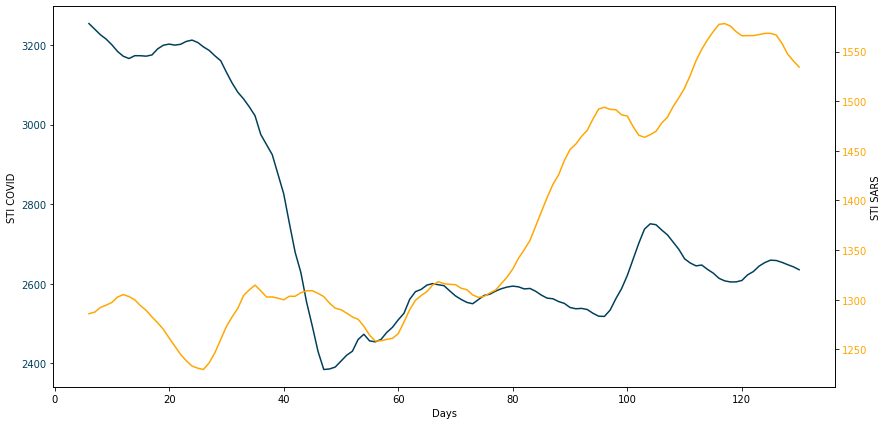

In [7]:
#plot multi axes graph
fig, ax = plt.subplots(figsize=(14, 7))
ax1, ax2 = two_scales(ax, days, covid_STI_rolling, sars_STI_rolling, 'STI COVID', 'STI SARS')
color_y_axis(ax1, '#003f5c')
color_y_axis(ax2, '#ffa600')

NIKKEI Covid vs SARS

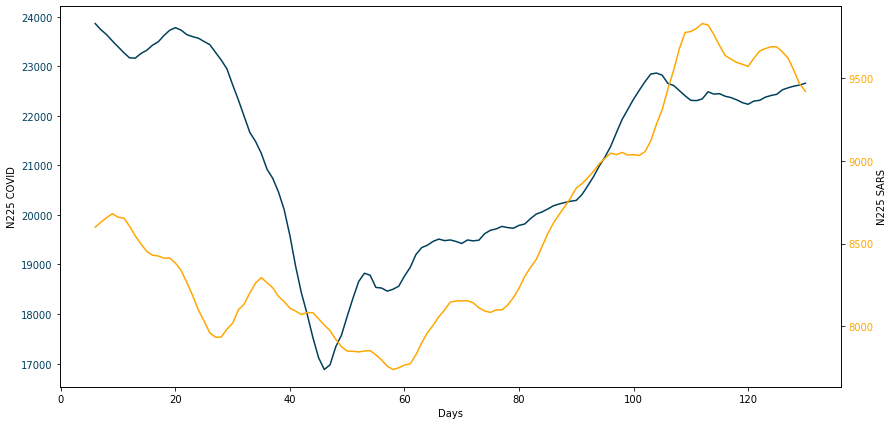

In [8]:
#plot multi axes graph
fig, ax = plt.subplots(figsize=(14, 7))
ax1, ax2 = two_scales(ax, days, covid_N225_rolling, sars_N225_rolling, 'N225 COVID', 'N225 SARS')
color_y_axis(ax1, '#003f5c')
color_y_axis(ax2, '#ffa600')

S&P500 Covid vs SARS

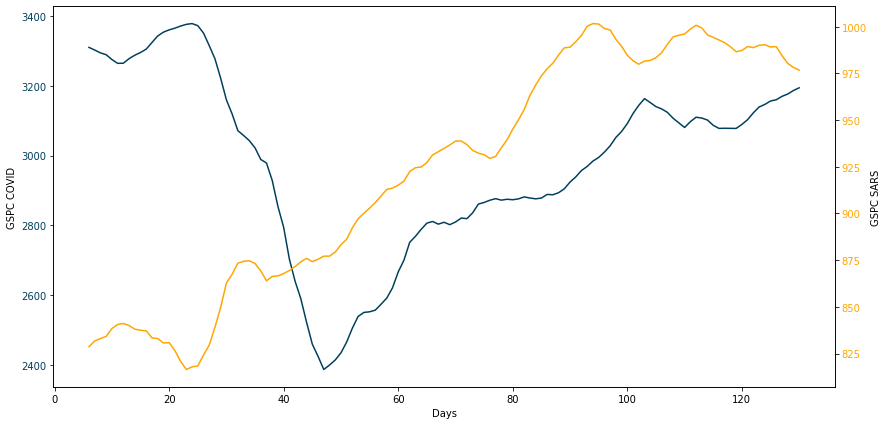

In [9]:
#plot multi axes graph
fig, ax = plt.subplots(figsize=(14, 7))
ax1, ax2 = two_scales(ax, days, covid_GSPC_rolling, sars_GSPC_rolling, 'GSPC COVID', 'GSPC SARS')
color_y_axis(ax1, '#003f5c')
color_y_axis(ax2, '#ffa600')

Fluctuation of STI

Fluctuation of NIKKEI

Fluctuation of S&P500

Correlation

In [10]:
covid_df=covid_df.set_index('Date_COVID')
# covid_df.iloc[:,1:3]

sars_df.set_index('Date_SARS')

spx_corr = lambda x: x.corrwith(x["^STI"])

rets = covid_df.pct_change().dropna()
rets.columns = rets.columns.droplevel(0)
# rets

get_month = lambda x: x.month
by_month = rets.groupby(get_month)
# by_month

by_month.apply(spx_corr)

,^GSPC,^N225,^STI
1,-0.442181,0.230015,1.0
2,0.305900,0.588209,1.0
3,0.450583,0.584312,1.0
4,0.527622,0.617079,1.0
5,-0.001226,0.467767,1.0
6,0.505536,0.808540,1.0
7,0.691616,0.301072,1.0


Conclusion